<a href="https://colab.research.google.com/github/tgp989/Integracion-de-datos-y-prospectiva/blob/main/3_Integracion_acept_rech_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Se procede con la carga de las librerias de trabajo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# @title Caracterización de Distribuciones de Probabilidad
def caracterizacion(LDA):

  #Se procede con la creación de la distribución
  plt.figure(figsize=(10,5))
  sns.histplot(LDA,bins=10,kde=True)
  plt.xlabel("Pérdida (KUSD)")
  plt.grid()
  plt.show()

  #Se procede con la caracterización de cada una de las variables
  np.set_printoptions(suppress=True)
  NI=10    #Indica el número de clusters
  counts,bin_edges=np.histogram(LDA,bins=NI)
  print("El número de datos por intervalo es:")
  print(counts)
  print("Los intervalos inferiores:")
  print(bin_edges[:-1])
  print("Los intervalos superiores:")
  print(bin_edges[1:])
  XC=(bin_edges[:-1]+bin_edges[1:])/2

  #Se configura la tabla de los datos
  Tabla=np.column_stack((bin_edges[:-1],bin_edges[1:],XC,counts))
  df=pd.DataFrame(Tabla,columns=['LI','LS','XC','ND'])
  df.head(10)

  #Se procede con la estimación de la media
  fr=counts/np.sum(counts)
  u=np.sum(XC*fr)
  sigma2=np.sum(fr*(XC-u)**2)
  sigma=np.sqrt(sigma2)
  Cas=np.sum(fr*(XC-u)**3)/sigma**3
  Kur=(np.sum(fr*(XC-u)**4)/sigma**4)-3

  return u,sigma,Cas,Kur,df

In [3]:
# @title Parametros de Riesgo
def RiskParameters(LDA):

  NDT=len(LDA)
  PE=np.mean(LDA)                       #Pérdidas esperadas
  NPE=np.sum(LDA<PE)                    #Cuantos eventos de riesgo no generan cobro - EVERGREEN
  OpVar=np.percentile(LDAo,99.9)        #Valor seguro para cubrir pérdidas catastroficas que requieren intervención de seguro
  NPC=np.sum(LDA>OpVar)                 #Numero de perdidas catastroficas
  NPNE=NDT-NPE-NPC                      #Las perdidas no esperadas - gestionables

  return OpVar,NPE,NPNE,NPC

1. Se procede con la carga de los archivos de trabajo

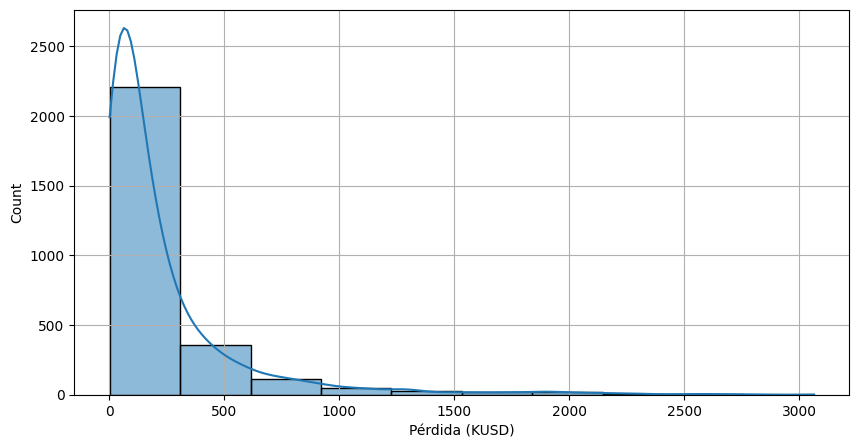

El número de datos por intervalo es:
[2209  356  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.59919687  308.92945016  615.25970344  921.58995673 1227.92021002
 1534.25046331 1840.5807166  2146.91096988 2453.24122317 2759.57147646]
Los intervalos superiores:
[ 308.92945016  615.25970344  921.58995673 1227.92021002 1534.25046331
 1840.5807166  2146.91096988 2453.24122317 2759.57147646 3065.90172975]


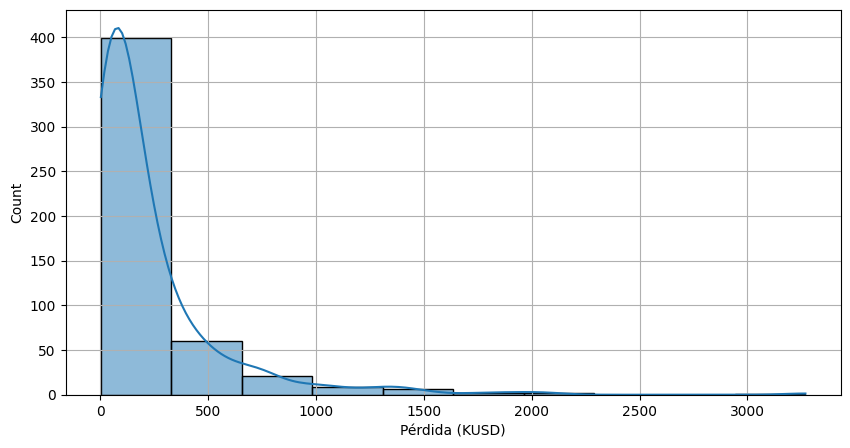

El número de datos por intervalo es:
[399  60  21   9   6   2   2   0   0   1]
Los intervalos inferiores:
[   4.03439342  330.51513547  656.99587751  983.47661956 1309.95736161
 1636.43810365 1962.9188457  2289.39958775 2615.88032979 2942.36107184]
Los intervalos superiores:
[ 330.51513547  656.99587751  983.47661956 1309.95736161 1636.43810365
 1962.9188457  2289.39958775 2615.88032979 2942.36107184 3268.84181389]


In [4]:
nxlo='/content/drive/MyDrive/integración de datos y prospectiva/2/1. RiesgoOperacional_EVERGREEEN (1).xlsx'
nxle='/content/drive/MyDrive/integración de datos y prospectiva/2/2. LógicaBorrosa_HAPAG_LLOYD.xlsx'

#Se procede con la caracterización de la distribución de datos internos
XDBo=pd.read_excel(nxlo,sheet_name=0) # Commented out the original line causing the error
LDAo=XDBo.iloc[:,1]*XDBo.iloc[:,2]
uo,sigmao,Caso,Kuro,dfo=caracterizacion(LDAo)
OpVaro,NPEo,NPNEo,NPCo=RiskParameters(LDAo)

#Se procede con la caracterización de la distribución de los datos externos
XDBe=pd.read_excel(nxle,sheet_name=0) # Commented out the original line causing the error
LDAe=XDBe.iloc[:,3]*XDBe.iloc[:,4]
ue,sigmae,Case,Kure,dfe=caracterizacion(LDAe)
OpVare,NPEe,NPNEe,NPCe=RiskParameters(LDAe)

2. Se procede con la estimación de la teoría de la credibilidad

In [7]:
#Se procede del valor esperado de la varianza
NDo=len(LDAo);NDe=len(LDAe)
EPV=(sigmao*NDo+sigmae*NDe)/(NDo+NDe)

#Se procede con la estimación del Valor Hipotetico de la Media
uh=(uo*NDo+ue*NDe)/(NDo+NDe)
VHM=((NDo*uo**2+NDe*ue**2)/(NDo+NDe))-uh**2

#Se procede con la estimación del fc
fc=EPV/VHM

#Se procede con la estimación de la credibilidad
Cr=NDo/(NDo+fc)
print("La media de los datos internos es:",uo)
print("La media de los datos externos es:",ue)
print("La credibilidad es:",Cr)

La media de los datos internos es: 279.6510949925361
La media de los datos externos es: 287.419677516929
La credibilidad es: 0.9855495805688581


3. Cuales son los datos de integracion?

In [11]:
LDAint=np.copy(np.array(LDAo))           #Variable de integracion
LDAe=np.array(LDAe)

m1=0
for k in range(len(LDAe)):
  VP=np.exp(-0.5*((uo-LDAe[k])/sigmao)**2)

  if VP > 0.9:
    m1=m1+1                               #Contador de datos integrados
    LDAint=np.append(LDAint,LDAe[k])
    print("El dato a integrar es:",LDAe[k])

El dato a integrar es: 257.1022943543983
El dato a integrar es: 171.98222901074186
El dato a integrar es: 265.38090724116347
El dato a integrar es: 174.5053431328871
El dato a integrar es: 380.45948176578435
El dato a integrar es: 235.11700562123085
El dato a integrar es: 208.37010219685712
El dato a integrar es: 266.33618172417835
El dato a integrar es: 199.2506075998282
El dato a integrar es: 258.3470066991441
El dato a integrar es: 144.03681394579914
El dato a integrar es: 278.28928445327784
El dato a integrar es: 144.91145461760175
El dato a integrar es: 293.93947206030646
El dato a integrar es: 192.26987396574182
El dato a integrar es: 150.30769224799752
El dato a integrar es: 369.453754176964
El dato a integrar es: 152.43548921496287
El dato a integrar es: 180.43811580627047
El dato a integrar es: 168.0899584192827
El dato a integrar es: 144.6493565388001
El dato a integrar es: 156.03724567684205
El dato a integrar es: 257.41866909370293
El dato a integrar es: 341.7630513219859
E

4. Validamos propiedades estadisticas

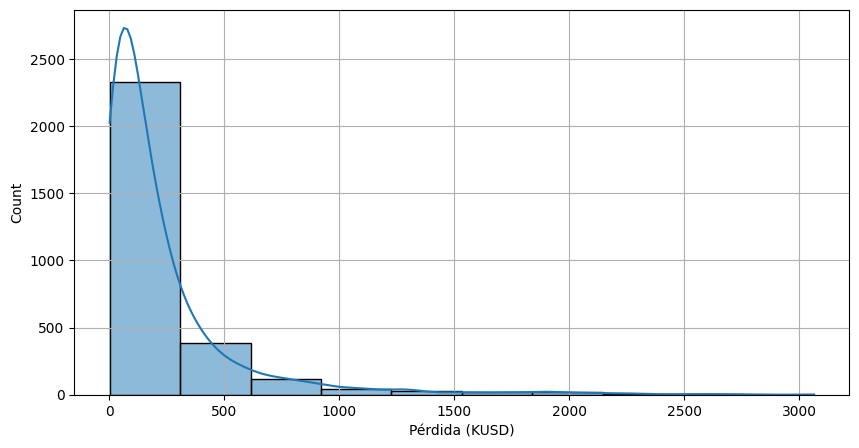

El número de datos por intervalo es:
[2330  385  116   46   27   18   20    7    4    1]
Los intervalos inferiores:
[   2.59919687  308.92945016  615.25970344  921.58995673 1227.92021002
 1534.25046331 1840.5807166  2146.91096988 2453.24122317 2759.57147646]
Los intervalos superiores:
[ 308.92945016  615.25970344  921.58995673 1227.92021002 1534.25046331
 1840.5807166  2146.91096988 2453.24122317 2759.57147646 3065.90172975]


''''''''''''''''''''''''''''''''''''''''
La media de los datos observados es: 279.6510949925361
La media de los datos integrados es: 276.36760197406454
La discrepancia entre las medias es: 1.174139160284429


In [13]:
ui,sigmai,Casi,Kuri,dfi=caracterizacion(LDAint)
print("\n")
print("''''''''''''''''''''''''''''''''''''''''")
print("La media de los datos observados es:",uo)
print("La media de los datos integrados es:",ui)
disc_u=np.abs((uo-ui)/uo)*100                    #Cual es la discrepancia entre las medidas
print("La discrepancia entre las medias es:",disc_u)

**Analisis de los datos**
De lo anterior podemos observar, que los datos externos posse una credibilidad cercana al 98%, lo que indica que mas del 90% de los datos pueden ser integrados a la base de datos interna. De acuerdo con la media de los datos integrados, podemos observar que esta media tuvo una discrepancia cercana al 1.17%, lo que corrobora el nivel de credibilidad alcanzado por la base de daros externa, frente a la base de datos interna. Quedo pendiente de hacer lo mismo para desviacion (sigma), el coeficiente de asimetria, y la kurtosis con el fin de garantizar estabilidad en la integracion.